# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №5 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 14 мая 2018, 18:00 <br\>
**Штраф за опоздание:** -3 балла после 06:00 17 мая, -6 балла после 06:00 24 мая, -9 баллов после 06:00 31 мая

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw5.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (5 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (3 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (5 балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (2 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [3]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt
# from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
# import mpl_toolkits.basemap as bm
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)
# Plotting config
%pylab inline
%load_ext pycodestyle_magic

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1.	Авдюнина Полина
2.	Авилова Екатерина
3.	Акентьева Анна
4.	Акиньщиков Алексей
5.	Аладушкин Данил
6.	Алекберов  Ибрагим
7.	Анисимова Мария
8.	Анненков Сергей
9.	Баянов Виктор
10.	Болычев Антон
11.	Бучкин Александр
12.	Господинов Георгий
13.	Гультиков Никита
14.	Даниелян Сурен
15.	Димов Илья
16.	Доронин Роман
17.	Евстифеев Степан
18.	Жирнов Михаил
19.	Жиянов Антон
20.	Иванов Илья
21.	Ивушкин Алексей
22.	Имеев Мерген
23.	Кононов Сергей
24.	Константиновский Борис
25.	Котелевский Никита
26.	Кочура Кирилл
27.	Кузнецов Алексей
28.	Кузьмин Сергей
29.	Кулагин Алексей
30.	Малков Кирилл
31.	Мальцев Александр
32.	Матюшин Максим
33.	Мокроусов Илья
34.	Мольков Егор
35.	Окладников Сергей
36.	Павлов Вячеслав
37.	Павлов Евгений
38.	Пащенко Александр
39.	Петренко Сергей
40.	Пиджакова Анна
41.	Пилипенко Никита
42.	Пропажин Артём
43.	Пшеничный Николай
44.	Радченко Руслан
45.	Рябинин Михаил
46.	Секретарев Тихон
47.	Сенотов Валерий
48.	Сивков Антон
49.	Сидоренко Артур
50.	Сильниченко Игорь
51.	Слабоузова Анна
52.	Слепов Николай
53.	Соколова Ксения
54.	Торосян Армине
55.	Трунин Александр
56.	Федотова Алёна
57.	Холин Роман
58.	Храмов Алексей
59.	Чернышёв Александр
60.	Шляпин Илья
61.	Шмурак Денис
62.	Шпитальник Александр
63.	Щеголев Всеволод

In [4]:
N = 51 # put your index here

In [5]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print ("Реализуем алгоритм кластеризации '%s'" % my_algorithm)

Реализуем алгоритм кластеризации 'Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [23]:
# %%pycodestyle
# Задание 1
from sklearn.base import BaseEstimator, ClusterMixin


class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according
    """

    def __init__(self, k=2, max_iter=10, tol=0.001, random_state=None):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.k = k
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        return

    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        n = x.shape[0]
        d = x.shape[1]

        indeces = np.arange(n)
        np.random.seed(self.random_state)
        np.random.shuffle(indeces)

        means = x[indeces[:self.k]]
        sigma = np.array([np.eye(d) for i in range(self.k)])
        probs = np.ones(self.k) / self.k

        for it in range(self.max_iter):
            tmp_for_gamma = np.empty((n, self.k))
            for i in range(self.k):
                tmp_for_gamma[:, i] = multivariate_normal.pdf(x, mean=means[i],
                                                              cov=sigma[i])
            tmp_for_gamma = probs * tmp_for_gamma
            gamma = tmp_for_gamma / tmp_for_gamma.sum(axis=1).reshape((-1, 1))

            N_k = gamma.sum(axis=0)

            new_means = np.zeros((self.k, d))
            new_sigma = sigma.copy()
            for i in range(self.k):
                new_means[i] = 1. / N_k[i].reshape((-1, 1)) * \
                            (gamma[:, i].reshape((-1, 1))*x).sum(axis=0)

                tmp_matrix1 = x - means[i]
                tmp_matrix2 = np.empty((n, d*d))
                for ii in range(d):
                    for jj in range(ii, d):
                        tmp_matrix2[:, ii*d+jj] = \
                            tmp_matrix1[:, ii] * tmp_matrix1[:, jj]
                        tmp_matrix2[:, jj*d+ii] = \
                            tmp_matrix1[:, ii] * tmp_matrix1[:, jj]

                trans_tmp_m2 = np.reshape(tmp_matrix2, (n, d, d))
                trans_tmp_m2 = gamma[:, i].reshape((-1, 1, 1)) * trans_tmp_m2
                trans_tmp_m2 = trans_tmp_m2.sum(axis=0)

                sigma_i = 1. / N_k[i] * trans_tmp_m2
                sigma_i = np.abs(sigma_i)

                if np.linalg.det(sigma_i) > 0.0000001:
                    if np.min(sigma_i) > 0.001:
                        if np.linalg.matrix_rank(sigma_i) == d:
                            new_sigma[i] = sigma_i.copy()

            new_probs = N_k / n
            crit = new_means - means
            if (crit**2).mean() < self.tol:
                break

            sigma = new_sigma.copy()
            means = new_means.copy()
            probs = new_probs.copy()

        self.means = new_means.copy()
        self.sigma = new_sigma.copy()
        self.probs = new_probs.copy()
        return self

    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        n = x.shape[0]
        means = self.means
        sigma = self.sigma
        probs = self.probs

        tmp_for_gamma = np.empty((n, self.k))
        gamma = np.ones((n, self.k)) * 0.01
        for i in range(self.k):
            tmp_for_gamma[:, i] = multivariate_normal.pdf(x, mean=means[i],
                                                          cov=sigma[i])
        tmp_for_gamma = probs * tmp_for_gamma
        gamma = tmp_for_gamma / tmp_for_gamma.sum(axis=1).reshape((-1, 1))

        return np.argmax(gamma, axis=1)

    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

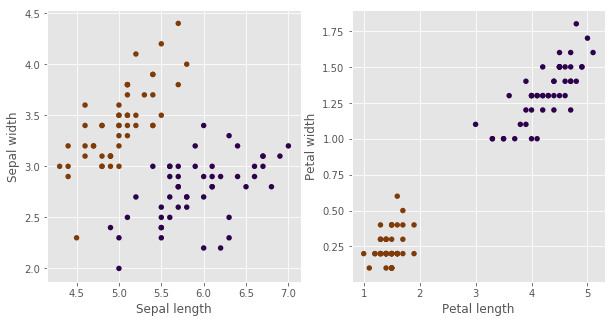

In [381]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [382]:
pred_iris = Clustering().fit_predict(x_iris)
print ("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris))

Adjusted Rand index for iris is: 1.00


In [388]:
%%timeit
clf = Clustering(k=2)
y = Clustering().fit_predict(x_iris)

3.38 ms ± 114 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [384]:
from sklearn.mixture import GaussianMixture

In [394]:
%%timeit
clf = GaussianMixture(n_components=2)
clf.fit(x_iris)
y = clf.predict(x_iris)

2.34 ms ± 45.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [20]:
## Задание 2
from scipy.spatial.distance import cdist
def quality(x, y):
    """
    Implement quality criterion of your choice
    """

    k = y.max()+1
    centroids = np.zeros((k, x.shape[1]))
    good_indeces = []
    for i in range(k):
        if (y==i).sum() != 0:
            good_indeces.append(i)
        centroids[i] = x[y==i].mean(axis=0)
    centroids = centroids[good_indeces]
    dists = cdist(x, centroids)**2
    close_centr = np.argmin(dists, axis=1)
    inertia = ((x - centroids[close_centr])**2).sum()
    return inertia

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

/home/feax/.local/lib/python3.5/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice.
  
/home/feax/.local/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


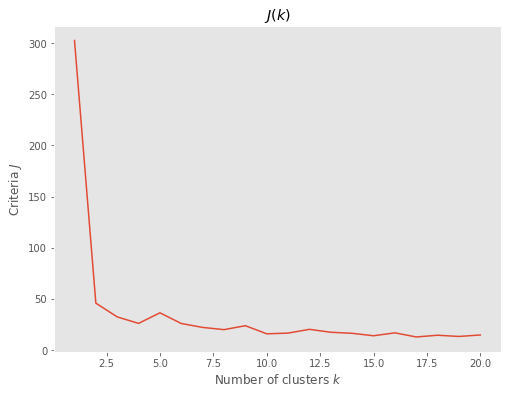

In [21]:
ks = range(1, 21)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = Clustering(k)
    y = cls.fit_predict(x_iris)
    criteria[i] = quality(x_iris, y)
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

In [367]:
## Задание 3

df = pd.read_csv('./WDI_csv/WDIData.csv')
year = '2016'
df = df[['Country Name', 'Indicator Name', year]]
df = df.pivot(index='Country Name', columns='Indicator Name', values=year)
df = df.fillna(0)
df = df[df.columns[(df**2 < 0.0001).sum(axis=0) < 16]]
df = (df - df.mean()) / df.std() 
df[10:20]

Indicator Name,Access to electricity (% of population),"Access to electricity, urban (% of urban population)","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Individuals using the Internet (% of population),Land area (sq. km),Merchandise exports by the reporting economy (current US$),Merchandise exports to economies in the Arab World (% of total merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in East Asia & Pacific (% of total merchandise exports),...,Rural population (% of total population),Rural population growth (annual %),Secure Internet servers,Secure Internet servers (per 1 million people),Surface area (sq. km),Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Urban population,Urban population (% of total),Urban population growth (annual %)
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,0.475129,0.495548,-0.795128,0.491098,1.588737,-0.336856,-0.290687,-0.540436,-0.116348,-0.691704,...,0.779315,0.346546,-0.221339,-0.061479,-0.336931,-0.802815,-1.284001,-0.318022,-0.697839,-1.335136
Australia,0.637424,0.495548,-0.651479,-0.274281,1.406530,0.171499,-0.178444,-0.309055,-0.268244,1.684098,...,-1.279589,-0.055189,-0.041459,0.722898,0.159999,1.152526,0.087531,-0.273951,1.312601,-0.207185
Austria,0.637424,0.495548,-0.886815,0.639302,1.272023,-0.331407,-0.201450,-0.380103,1.174755,-0.546799,...,-0.275868,0.415818,-0.152564,0.790031,-0.331558,1.142224,1.043017,-0.306367,0.332506,-0.478749
Azerbaijan,0.637424,0.495548,-0.293768,-0.511136,1.061662,-0.331398,-0.285374,-0.266989,0.091203,-0.423238,...,0.199366,0.120453,-0.220513,-0.341110,-0.331384,-0.455085,-0.481926,-0.307200,-0.131541,-0.223215
"Bahamas, The",0.637424,0.495548,-0.484767,-0.325374,1.123499,-0.336205,-0.290412,-0.258738,-0.142377,-0.741306,...,-0.997828,0.235090,-0.220861,-0.100097,-0.336052,-0.753187,1.273135,-0.317449,1.037472,-0.483172
Bahrain,0.637424,0.495548,-0.438547,-1.675446,1.741871,-0.336817,-0.283247,3.907533,0.853299,-0.203562,...,-1.248908,2.003321,-0.220102,-0.208878,-0.336893,-0.721519,-0.769573,-0.315532,1.282642,1.254438
Bangladesh,-0.244784,0.159365,-0.044311,-0.685731,-0.997967,-0.328254,-0.273052,-0.362515,0.617718,-0.541843,...,1.046824,-0.281026,-0.220133,-0.355310,-0.327466,-0.498985,-0.943828,-0.201835,-0.959050,0.853735
Barbados,0.637424,0.495548,-0.707489,1.161735,1.108019,-0.336839,-0.290478,-0.513815,0.402546,-0.443317,...,1.201295,0.019255,-0.220830,0.011391,-0.336915,-0.838963,-1.215633,-0.317928,-1.109886,-1.228255
Belarus,0.637424,0.495548,-0.660892,1.789739,0.818197,-0.323440,-0.276923,-0.459181,-1.238814,-0.516959,...,-0.745852,-1.255849,-0.216525,-0.279791,-0.323616,-0.176908,-0.535287,-0.303200,0.791428,-0.877886


In [368]:
df.shape

(264, 31)

In [376]:
n_clusters = 5
clf = Clustering(k = n_clusters, max_iter=100)
ans = clf.fit_predict(df.values)

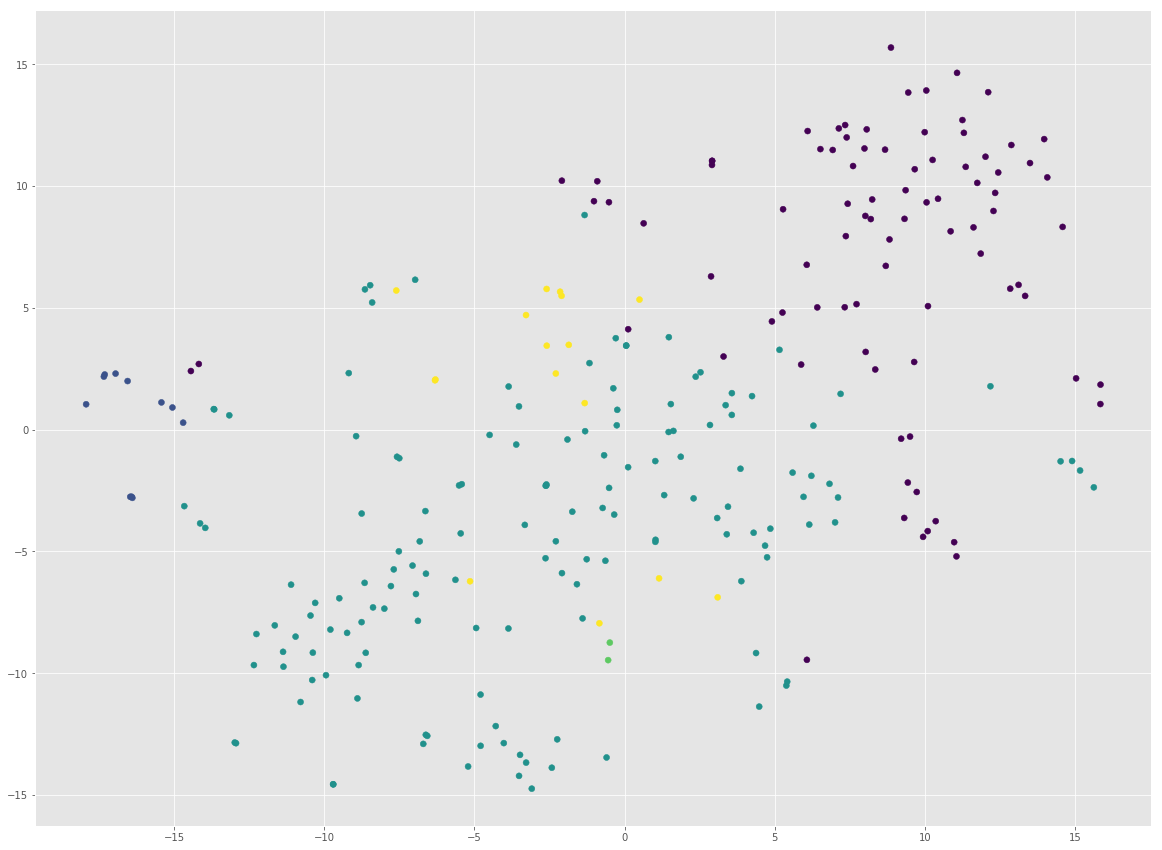

In [377]:
from sklearn.manifold import TSNE
x_tsne = TSNE(n_components=2).fit_transform(df.values, ans)
pl.figure(figsize=(20, 15))
pl.scatter(x_tsne[:, 0], x_tsne[:, 1], c=ans)
plt.show()

Size of cluster:  87
Index(['Afghanistan', 'American Samoa', 'Angola', 'Arab World', 'Bangladesh',
       'Benin', 'Botswana', 'British Virgin Islands', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire',
       'Djibouti', 'Early-demographic dividend', 'Equatorial Guinea',
       'Eritrea', 'Ethiopia', 'Fragile and conflict affected situations',
       'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Heavily indebted poor countries (HIPC)', 'IDA blend', 'IDA only',
       'IDA total', 'India', 'Iraq', 'Kenya', 'Kiribati',
       'Korea, Dem. People’s Rep.', 'Kyrgyz Republic', 'Lao PDR',
       'Least developed countries: UN classification', 'Lesotho', 'Liberia',
       'Low income', 'Lower middle income', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Micronesia, Fed. Sts.', 'Mongolia', 'Mozambique',
       'Myanmar', 'Namibia', 'Nepal', 'Niger', 'N

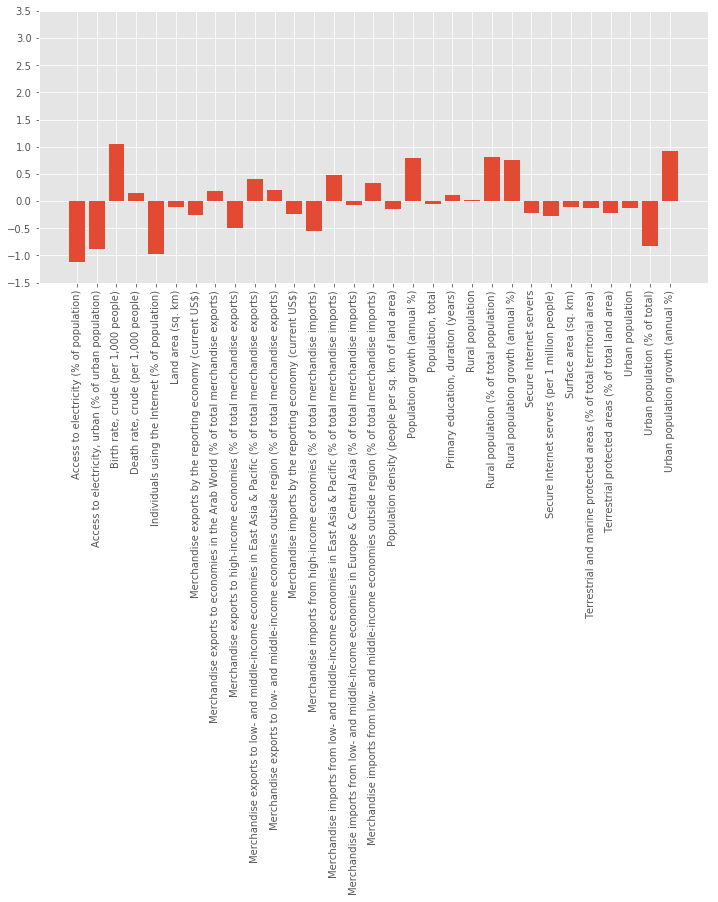



Size of cluster:  11
Index(['East Asia & Pacific', 'High income', 'IBRD only', 'IDA & IBRD total',
       'Late-demographic dividend', 'Low & middle income', 'Middle income',
       'OECD members', 'Post-demographic dividend', 'Upper middle income',
       'World'],
      dtype='object', name='Country Name')


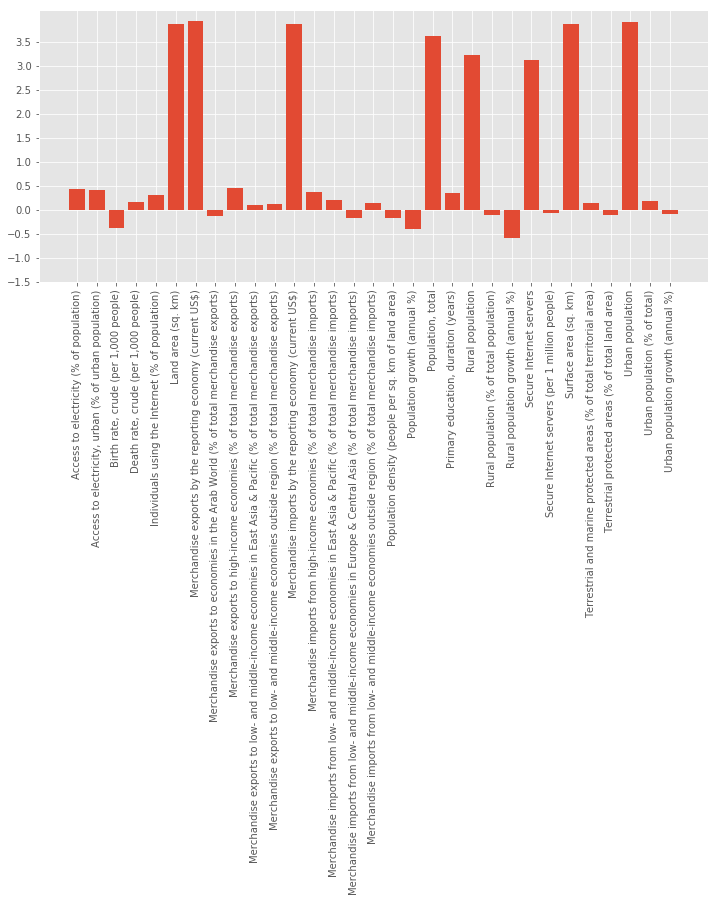



Size of cluster:  148
Index(['Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'Tunisia', 'Turkey', 'Turks and Caicos Islands', 'Ukraine',
       'United Kingdom', 'United States', 'Uruguay', 'Venezuela, RB',
       'Vietnam', 'Virgin Islands (U.S.)'],
      dtype='object', name='Country Name', length=148)


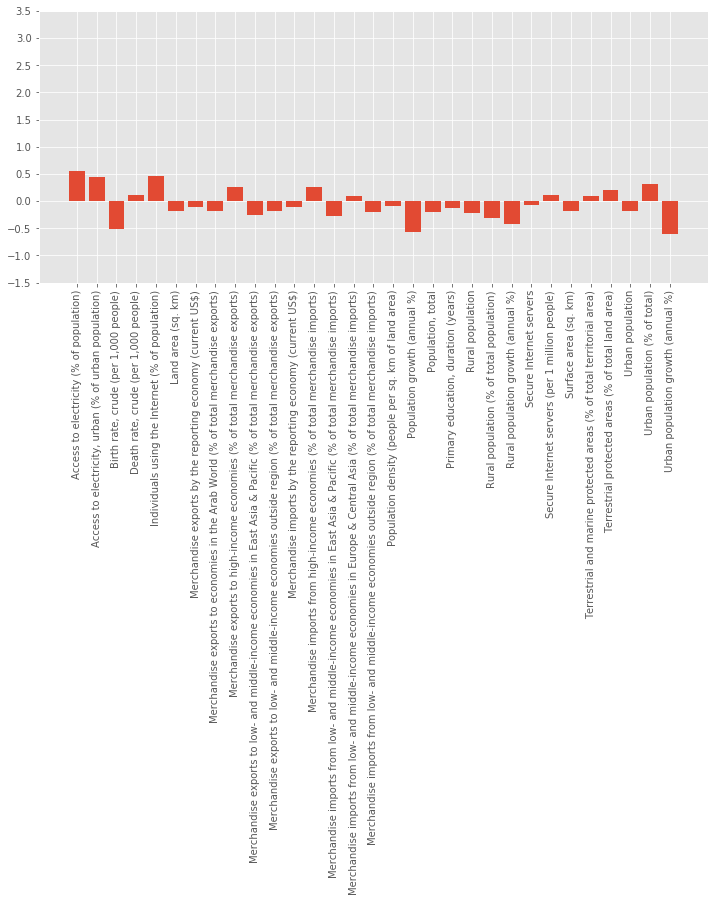



Size of cluster:  2
Index(['Macao SAR, China', 'Monaco'], dtype='object', name='Country Name')


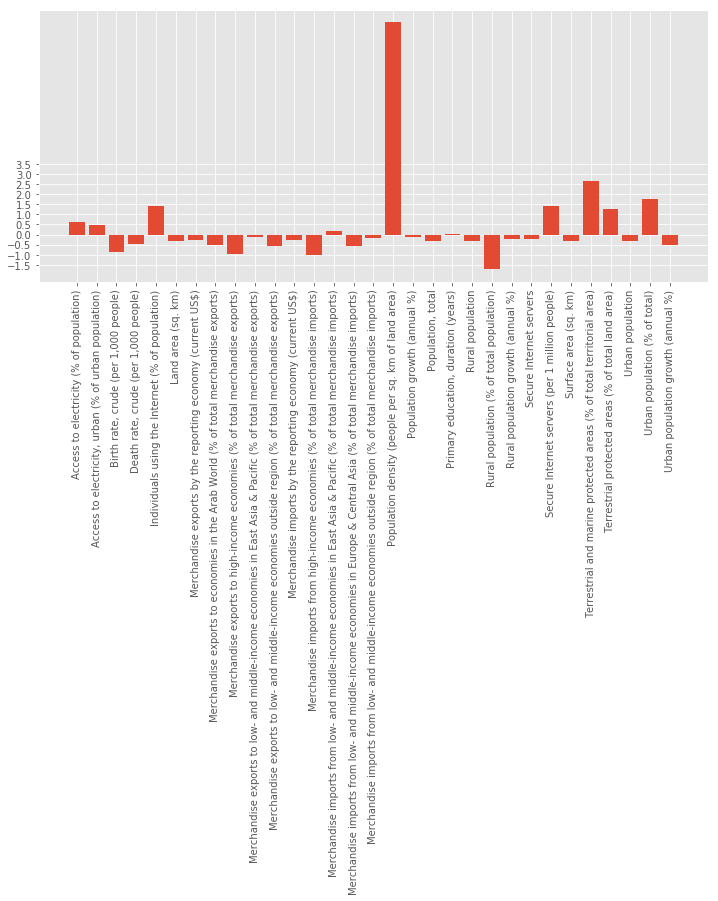



Size of cluster:  16
Index(['Bahrain', 'Cayman Islands', 'Gibraltar', 'Jordan', 'Kuwait', 'Lebanon',
       'Maldives', 'Nauru', 'Oman', 'Qatar', 'Saudi Arabia', 'Singapore',
       'Sint Maarten (Dutch part)', 'Tuvalu', 'United Arab Emirates',
       'West Bank and Gaza'],
      dtype='object', name='Country Name')


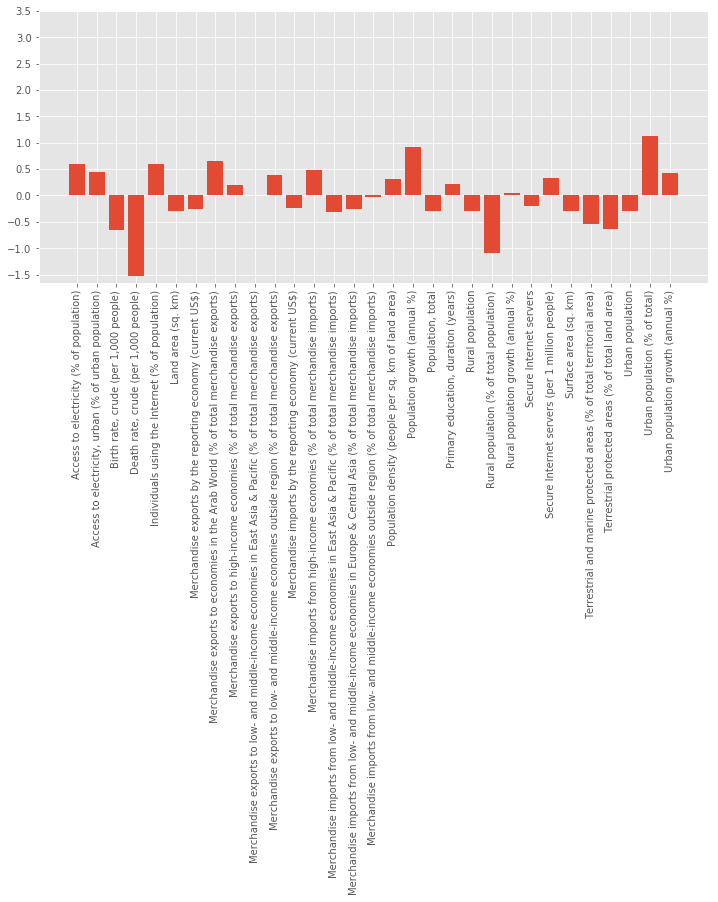

In [379]:
centroids = clf.means
indicators = df.columns.values
for i in range(n_clusters):
    cluster = df.index[ans == i]
    print('Size of cluster: ', cluster.size)
    print(cluster)
    plt.bar(range(centroids.shape[1]), centroids[i])
    plt.xticks(range(centroids.shape[1]), indicators, rotation = 90)
    plt.yticks(np.arange(-1.5, 4, 0.5))
    plt.show()
    print()
    print()

In [331]:
## Задание 4

# Интерпретация каждого кластера:

#     1 - аграрные страны (доступа к элекстричеству нет, преимущественно сельское население, 
#                          население(сельское и городское) растет быстрыми темпами)
#     2 - не страны

#     3 - страны, которые уже перешли к городскому образу жизни, 
#                             есть электричество, интернет, какой-то импорт, экспорт, но население убывает
#     Это и есть общий кластер, в него попали все основные страны с относительно развитой экономикой, образованием
#     Все показатели у него усредненные, видимо, потому что попали страны с разными показателями, 
#     но примерно с одним уровнем жизн

#     4 - очень высокая плотность населения

#     5 - маленькие государства, расположенные либо на островах, либо в заливах

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.